In [1]:
# Домашнее задание №2: bonus по курсу "Машинное обучение"
# Выполнила Мирейко Наталья

% matplotlib inline

import csv
import numpy as np
from numpy.linalg import inv
from __future__ import division
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

data_x = []
data_y = []
with open('basketball.csv', 'rb') as csv_file:
    basketball_reader = csv.reader(csv_file, delimiter=',', quotechar='|')
    next(basketball_reader, None)
    for row in basketball_reader:
        data_x.append([row[0], row[1], row[2], row[3]])
        data_y.append([row[4]])

X = np.array(data_x, dtype=float).transpose()
Y = np.array(data_y, dtype=float)


In [2]:
def calculate_mse(X, Y, W):
    sum = 0
    for index, x in enumerate(X.transpose()):
        sum += pow(((x).dot(W) - (Y[index][0])).item(), 2)
    return sum / Y.shape[0]


In [3]:
def ridge_regression(X, Y, parameter):
    return inv(X.dot(X.transpose()) + (parameter*np.identity(X.shape[0]))).dot(X).dot(Y)


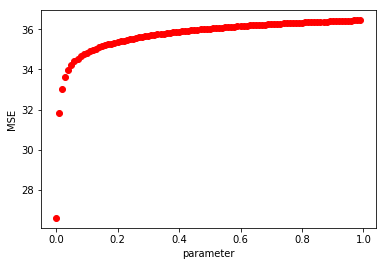

In [4]:
plt.xlabel('parameter')
plt.ylabel('MSE')

for parameter in range(0, 100, 1):
    plt.plot(parameter/100, calculate_mse(X, Y, ridge_regression(X, Y, parameter)), 'ro')    
plt.show()